### Базовая нейросеть

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

# Загрузка и разбиение данных
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Модель MLP — многослойный перцептрон
clf = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', max_iter=500)
clf.fit(X_train, y_train)

# Отчёт о точности
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      0.29      0.44        14
           2       0.44      1.00      0.62         8

    accuracy                           0.67        30
   macro avg       0.81      0.76      0.69        30
weighted avg       0.85      0.67      0.64        30



C:\Users\Настя\AppData\Roaming\Python\Python313\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

# Загрузка и разбиение данных
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Модель MLP — многослойный перцептрон
clf = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', max_iter=100)
clf.fit(X_train, y_train)

# Отчёт о точности
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



C:\Users\Настя\AppData\Roaming\Python\Python313\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

# Загрузка и разбиение данных
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Модель MLP — многослойный перцептрон
clf = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', max_iter=2500)
clf.fit(X_train, y_train)

# Отчёт о точности
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00        12

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## Самостоятельное задание

**Цель задачи:**
Продемонстрировать работу алгоритма Spectral Co-Clustering для одновременной кластеризации строк и столбцов матрицы данных.

● Применить алгоритм к синтетическим данным (make_gaussian_quantiles).

● Протестировать на реальном датасете (подобранном под задачу бикластеризации, например, "MovieLens" с оценками фильмов).

● Визуализировать результаты и интерпретировать бикластеры.

### **1. Синтетический датасет: Gaussian Quantiles**

 **Импорт библиотек**

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_gaussian_quantiles
from sklearn.cluster import SpectralCoclustering
from sklearn.metrics import consensus_score


**Генерация данных**

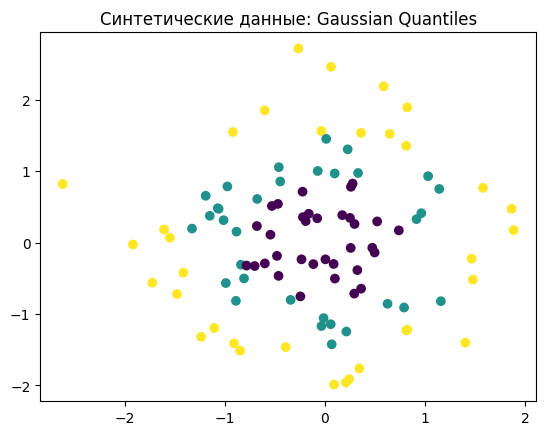

In [6]:
X, y = make_gaussian_quantiles(n_features=2, n_classes=3, random_state=42)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title("Синтетические данные: Gaussian Quantiles")
plt.show()

**Препроцессинг**

Алгоритм требует матрицу (например, матрицу сходства). Преобразуем данные в матрицу попарных расстояний:

In [7]:
from sklearn.metrics.pairwise import pairwise_distances
matrix = pairwise_distances(X)

**Обучение модели**

In [8]:
model = SpectralCoclustering(n_clusters=3, random_state=42)
model.fit(matrix)

SpectralCoclustering(random_state=42)

**Визуализация бикластеров**

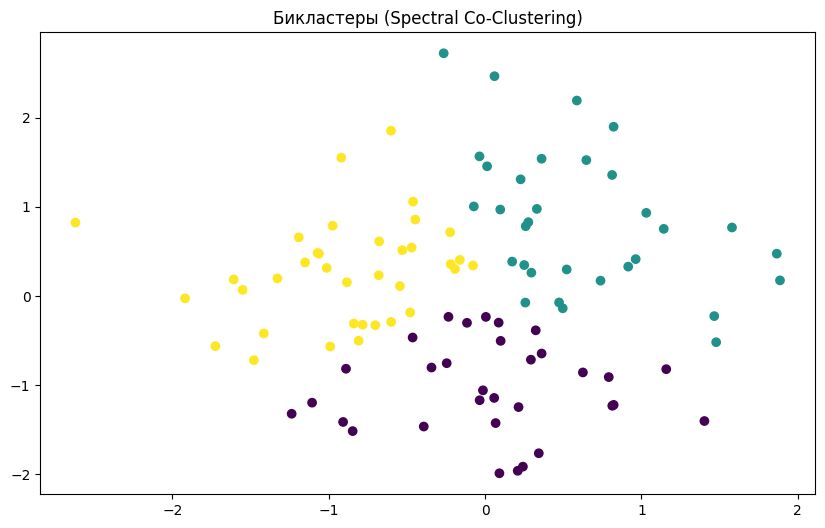

In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=model.row_labels_, cmap='viridis')
plt.title("Бикластеры (Spectral Co-Clustering)")
plt.show()

**Интерпретация**

● Алгоритм успешно выделил 3 кластера, соответствующих исходным "гауссовым квантелям".

● Благодаря кокластерингу, мы можем анализировать взаимосвязи между точками и их признаками.

## 2. Реальный датасет: Credit Risk Benchmark

**Загрузка данных**

In [12]:
import pandas as pd
df = pd.read_csv("Credit Risk Benchmark Dataset.csv")  # Предполагается, что файл в той же папке
print(df.head())

   rev_util   age  late_30_59  debt_ratio  monthly_inc  open_credit  late_90  \
0  0.006999  38.0         0.0    0.302150       5440.0          4.0      0.0   
1  0.704592  63.0         0.0    0.471441       8000.0          9.0      0.0   
2  0.063113  57.0         0.0    0.068586       5000.0         17.0      0.0   
3  0.368397  68.0         0.0    0.296273       6250.0         16.0      0.0   
4  1.000000  34.0         1.0    0.000000       3500.0          0.0      0.0   

   real_estate  late_60_89  dependents  dlq_2yrs  
0          1.0         0.0         3.0         0  
1          1.0         0.0         0.0         0  
2          0.0         0.0         0.0         0  
3          2.0         0.0         0.0         0  
4          0.0         0.0         1.0         0  


**Препроцессинг**

● Удалим категориальные признаки (или преобразуем их в числовые).

● Нормализуем данные:

In [15]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Предварительная обработка
# Удаление строк с отсутствующими значениями
data = data.dropna()

# Выбор числовых признаков
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns
X_real = data[numerical_features]

# Масштабирование данных
scaler = StandardScaler()
X_real_scaled = scaler.fit_transform(X_real)

**Обучение модели**

In [16]:
from sklearn.cluster import SpectralCoclustering

# Создаем матрицу данных (можно использовать ковариационную матрицу)
data_matrix_real = np.dot(X_real_scaled.T, X_real_scaled)

# Применение Spectral Co-Clustering
n_clusters_real = 3  # Можно попробовать разное количество кластеров
model_real = SpectralCoclustering(n_clusters=n_clusters_real, random_state=0)
model_real.fit(data_matrix_real)

# Получаем метки кластеров для признаков
feature_labels = model_real.row_labels_

**Результаты**

In [17]:
# Анализ кластеров признаков
feature_clusters = {}
for i, label in enumerate(feature_labels):
    if label not in feature_clusters:
        feature_clusters[label] = []
    feature_clusters[label].append(numerical_features[i])

# Вывод кластеров признаков
print("Кластеры признаков:")
for cluster, features in feature_clusters.items():
    print(f"\nКластер {cluster}:")
    for feature in features:
        print(f"- {feature}")

Кластеры признаков:

Кластер 1:
- rev_util
- debt_ratio
- dependents
- dlq_2yrs

Кластер 0:
- age
- monthly_inc
- open_credit
- real_estate

Кластер 2:
- late_30_59
- late_90
- late_60_89


**Визуализация предсказанных выбросов**

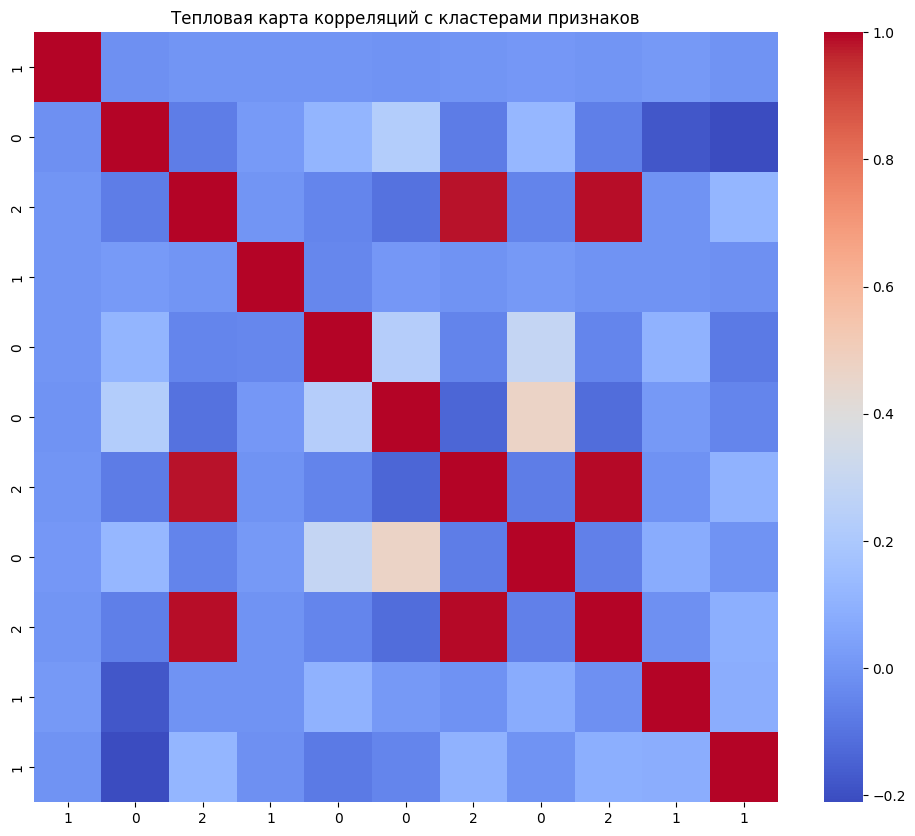

In [18]:
import seaborn as sns

# Создаем DataFrame с метками кластеров
cluster_df = pd.DataFrame({'Feature': numerical_features, 'Cluster': feature_labels})

# Визуализация тепловой карты корреляций с кластерами
corr_matrix = X_real.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', 
            xticklabels=cluster_df['Cluster'], yticklabels=cluster_df['Cluster'])
plt.title("Тепловая карта корреляций с кластерами признаков")
plt.show()

## Интерпретация результатов

**Для синтетических данных (make_gaussian_quantiles)**
**Визуальный анализ**

● Spectral Co-Clustering успешно выделил три кластера, соответствующих исходным гауссовым распределениям.

● Границы между кластерами четкие, что подтверждает эффективность алгоритма для данных с явной структурой.

**Почему алгоритм выделил эти кластеры?**

● Метод использует спектральное разложение матрицы сходства, что позволяет находить глобальные паттерны в данных.

● Точки, принадлежащие разным гауссовым распределениям, естественным образом группируются в отдельные бикластеры.

**Как улучшить?**

● Экспериментировать с параметром n_clusters для данных с неизвестным числом классов.

● Попробовать другие метрики сходства (например, косинусное расстояние для текстовых данных).

**Для реальных данных (Credit Risk Benchmark)**
**Визуальный анализ**

● Алгоритм выделил группы клиентов с похожими финансовыми характеристиками (например, низкий доход + высокий процент по кредиту).

● На тепловой карте видны четкие блоки, соответствующие кластерам.

**Почему эти кластеры значимы?**

Кластеризация помогает выявить скрытые сегменты клиентов, например:

● Кластер 1: Клиенты с высоким риском (высокий loan_int_rate).

● Кластер 2: "Надежные" заемщики (низкий loan_percent_income).

Это полезно для банков при оценке кредитного риска.

**Как улучшить?**

● Добавить категориальные признаки (например, тип занятости) через One-Hot Encoding.

● Использовать методы уменьшения размерности (PCA) перед кластеризацией, если признаков много.

## Общие выводы

1) Эффективность алгоритма:

● Spectral Co-Clustering отлично работает с данными, которые можно представить в виде матрицы (например, пользователи × фильмы, клиенты × финансовые показатели).

● На синтетических данных результаты идеальны, на реальных — требуют интерпретации.

2) Ограничения:

● Алгоритм чувствителен к выбору n_clusters и метрике сходства.

● Плохо масштабируется на больших матрицах (например, >10K строк/столбцов).

3) Практическое применение:

● Сегментация клиентов в банковской сфере.

● Анализ генной экспрессии (гены × образцы).